In [ ]:
%pip install plotly pandas numpy matplotlib seaborn scipy scikit-learn ipywidgets


In [ ]:
%pip install --upgrade nbformat

In [ ]:
%pip install nbformat==5.10.4

In [ ]:
import micropip

# Step 1: Explicitly UNINSTALL the old, broken version (4.2.0).
print("Attempting to uninstall the old nbformat...")
try:
    await micropip.uninstall('nbformat')
    print("Uninstall complete.")
except Exception as e:
    print(f"Could not uninstall, it might not be fully registered. Continuing... Error: {e}")

# Step 2: Now that the old version is gone, install a modern, compatible version.
print("\nInstalling modern nbformat (v5.10.4)...")
await micropip.install('nbformat==5.10.4')
print("Installation complete.")

# Step 3: The final verification.
import nbformat
print("\n--- VERIFICATION ---")
print(f"SUCCESS: Now running nbformat version: {nbformat.__version__}")
print("--------------------")

# You can now safely run your application code.

In [ ]:
import sys
import micropip
await micropip.install('nbformat')
import plotly.io as pio
pio.renderers.default = "iframe"  # or "svg"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import io
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from ipywidgets import Dropdown, VBox, HBox
from IPython.display import display
from scipy.stats import zscore
import os
import nbformat
print(f"Successfully imported nbformat version: {nbformat.__version__}")
from IPython.display import HTML






Project Overview: Music as a Mirror of Real-World Events

People often choose music that reflects their current emotions. For instance, someone feeling sad may prefer slow, melancholic songs, while someone who is happy might opt for upbeat, energetic tracks. If emotional states influence music preferences, it raises an intriguing question: can broader real-world events, such as economic downturns, political crises, or major social movements also shape the kinds of music that become popular?

This project explores whether trends in Spotify’s top song lists can serve as indicators of real-world problems or shifts in public mood. By analyzing changes in popular music over time, we aim to investigate whether there is a detectable link between global or local events and the music people consume.

***Two Perspectives:***

**No Correlation Perspective:**
From this point of view, music trends are largely independent of real-world events. People may use music as a form of escapism, deliberately choosing songs that help them disconnect from their surroundings rather than reflect them. In this case, Spotify’s top charts might follow internal dynamics like artist popularity, marketing efforts, or viral trends, rather than external events like financial crises or political unrest.

**Economic Influence Perspective**
Alternatively, one could argue that economic and financial events do impact music behavior. For example, during times of economic stress, people might gravitate toward nostalgic or comforting music, influencing what appears in the charts. Similarly, economic factors could affect streaming habits, people might listen to more music during unemployment or choose free platforms over paid ones. These shifts in consumption patterns could leave visible traces in Spotify's top charts, potentially allowing researchers to use music data as a proxy for economic sentiment.


In [ ]:
current_dir = os.getcwd()

# File paths (assumes CSVs are in the same directory as the notebook)
spotify_path = os.path.join(current_dir, 'spotify_database.csv')
inflation_path = os.path.join(current_dir, 'US_inflation_rates_1974-2023.csv')
unemployment_path = os.path.join(current_dir, 'unemployment_analysis.csv')
interest_data = os.path.join(current_dir, 'FEDFUNDS.csv')

spotify_data = pd.read_csv(spotify_path, delimiter=';')
inflation_data = pd.read_csv(inflation_path)
unemployment_data = pd.read_csv(unemployment_path)
interest_data = pd.read_csv(interest_path)


In [ ]:
# METHOD: take the mean of inflation rate, unemployment rate, government debt, and interest rate per year, then take the most popular songs of that year, and plot correlations
columns_to_keep = ['Country Name', '2000', '2001', '2002', '2003', '2004', '2005',
                   '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                   '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
unemployment_df = unemployment_data[columns_to_keep]
unemployment_df.set_index('Country Name', inplace=True)
unemployment_countries = unemployment_df.transpose()
unemployment_us = unemployment_countries['United States'].reset_index()
unemployment_us.columns = ["Year", "Unemployment"]
unemployment_us['Year'] = unemployment_us['Year'].astype(int)

inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data['Year'] = inflation_data['date'].dt.year

inflation_data_annual_mean = inflation_data.groupby('Year')[['value']].mean().reset_index()

# delete all points before 2000 from the inflation df

inflation_data_annual_mean = inflation_data_annual_mean[inflation_data_annual_mean['Year'] >= 2000]

#the inflation calculations:

inflation_list = []
prev_value = None

for i in inflation_data_annual_mean['value']:
    if i > 0:
        if prev_value is not None and prev_value > 0:
            new_val = ((i / prev_value) - 1) * 100
            inflation_list.append(new_val)
        prev_value = i
    else:
        prev_value = None


# The spotify data year column ordening:

spotify_data['year'] = pd.to_datetime(spotify_data['year'], format='%Y')
spotify_data['year'] = spotify_data['year'].dt.year

spotify_data = spotify_data.sort_values(by='year')



NameError: name 'unemployment_data' is not defined


One of the datasets that is used in this notebook is 'put down link to the dataset for songs spotify' (https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023). In this dataset there are multiple variables about the top 100 songs on spotify for each year from 2000 untill 2023, including genre bpm, artist, and descriptive features like "energy", per song.

In [ ]:
#need descriptive plots for the spotify dataset



Another dataset used in this notebook is 'https://www.kaggle.com/datasets/pantanjali/unemployment-dataset'  in which the yearly unemployment rate is shown for 235 countries. Of these countries, we will focus on the USA, since that is one of the bigger countries that will thus have the biggest impact on spotify lists and also on real world events. Additionally, the music industry is highly centralized in the US, with the vast majority of produced music stemming from the country. Therefore global trends, defined by the US, are likely to affect the US significantly. In fact, it can be argued that global spotify trends affect the US more than the world, since the majority of the world outside the US (and the western hemisphere) does not even possess spotify. Financial data is a lot more accessible when constricted to the US, so this is also beneficial in the collection of high-quality datasets.




Let's start the analysis with a simple line plot of the unemployment, and inflation rate. As can be seen, the financial crises at 2008, and during the covid crisis of 2020, significantly increased unemployment. Additionally, the covid crisis increased inflation, but inflation actually sharply dropped during the 2008 crisis. Unemployment and inflation are a financial stressors often felt most by the working class, but, does this also shape the songs people listen to during times of economic hardship?

In [ ]:
plt.figure(figsize=(12, 7))

# Plot Unemployment
plt.plot(unemployment_us['Year'], unemployment_us['Unemployment'], marker='o', label='Unemployment Rate (%)')

# Plot Inflation
# Slicing inflation_list to match the length of the 'Year' column
plt.plot(unemployment_us['Year'], inflation_list[:22], marker='x', label='Inflation Rate (%)')

# Add titles and labels
plt.title('United States Unemployment and Inflation Rates (2000–2021)')
plt.xlabel('Year')
plt.ylabel('Rate (%)')

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Adjust layout
plt.tight_layout()

plt.show()


NameError: name 'unemployment_us' is not defined

<Figure size 1200x700 with 0 Axes>

First, to find out wether there are any correlations between some of the variables in the spotify songs; danceability, energy, valence and liveness, we compared the mean of the songs released each year to the inflation that occured each year and the unemployment that occured each year. As per the kaggle definitions: **Danceability** = The higher the value, the easier it is to dance to this song. **Valence**: = Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive. **Energy** = Shows the level of energy in a song. The higher the value, the more energetic a song is. Values range from 0-100, and **Liveness** = The higher the value, the more likely the song is a live recording. The bottom row of the correlation matrix is the key part, showing the correlation of the variables to inflation, and unemployment respectively.



In [ ]:

# Linking variables with inflation
# Clean column names
spotify_data.columns = spotify_data.columns.str.strip()

# --- Setup ---
variables = ['danceability', 'energy', 'valence', 'liveness']
years = list(range(2000, 2023))

# Assign each song a year label (assumes data ordered bottom=2000 → top=2023)
spotify_data = spotify_data[::-1].reset_index(drop=True)  # reverse to chronological
repeats = len(spotify_data) // len(years)
remainder = len(spotify_data) % len(years)
year_labels = np.repeat(years, repeats)
if remainder:
    year_labels = np.append(year_labels, [years[-1]] * remainder)

spotify_data['year'] = year_labels

# --- Compute yearly means ---
yearly_means = spotify_data.groupby('year')[variables].mean().reset_index()
yearly_means2 = yearly_means.merge(unemployment_us, left_on='year', right_on='Year', how='inner')
yearly_means['inflation'] = inflation_list
yearly_means2['Unemployment'] = yearly_means2['Unemployment']

# --- Correlation matrix ---
corr_matrix = yearly_means[variables + ['inflation']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Yearly Mean Correlation Matrix with Inflation')
plt.show()

# Second correlation matrix for unemployment:

corr_matrix_2 = yearly_means2[variables + ['Unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Yearly Mean Correlation Matrix with Unemployment')
plt.show()

danceability_list = yearly_means['danceability'].tolist()
energy_list = yearly_means['energy'].tolist()
valence_list = yearly_means['valence'].tolist()
liveness_list = yearly_means['liveness'].tolist()

# --- Pearson r and p-values ---
print("\nPearson correlations with inflation (yearly means):")
for var in variables:
    r, p = pearsonr(yearly_means[var], yearly_means['inflation'])
    print(f"{var}: r = {r:.3f}, p = {p:.3e}")

print("\nPearson correlations with unemployment (yearly means):")
for var in variables:
    r, p = pearsonr(yearly_means2[var], yearly_means2['Unemployment'])
    print(f"{var}: r = {r:.3f}, p = {p:.3e}")

# --- Visualize each variable vs inflation ---
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.regplot(x='inflation', y=var, data=yearly_means)
    plt.title(f"Yearly Mean {var.capitalize()} vs Inflation")
    plt.xlabel("Inflation Rate")
    plt.ylabel(f"Mean {var.capitalize()}")
    plt.tight_layout()
    plt.show()


for var in variables:
    plt.figure(figsize=(6, 4))
    sns.regplot(x='Unemployment', y=var, data=yearly_means2)
    plt.title(f"Yearly Mean {var.capitalize()} vs Unemployment")
    plt.xlabel("unemployment Rate")
    plt.ylabel(f"Mean {var.capitalize()}")
    plt.tight_layout()
    plt.show()

NameError: name 'spotify_data' is not defined



While most comparisons have fairly low correlation, and low r-scores, there is an exception. Danceability seems to have a significant negative correlation with unemployment, meaning that as unemployment increases, the average danceability level in songs seems to decrease. With an r-score of -0.633, and an r-squared score of 0.400689, this is statistically significant. It seems that as people lose their jobs, they become less interested in more danceable music, which, intuitively, makese sense. Arguiging from persepctive 1 however, there are no other stastically significant correlations, and this danceability correlation could just be a coincidence. Correlation does not equal causation, after all. Still, with r-scores such as this, this does give some slight merit to perspective 2. There is at least, in some limited fashion, some residual effect of unemployment on people's listening behaviour.

In the following two graphs, to illustrate this correlation more intuitively, we have overlayed these spotify metrics, with unemployment and inflation  respectively. Normalizing all the values (since the spotify metrics range from 0-100), there is a clear view of how each variable changes in response to inflation and correlation. Using these visualisations, it is fairly clear that inflation has no strong correlations, but danceability and unemployment are clearly inverted to each other. Using the dropdown menu, the user can freely browse the 4 categories in comparison to each economic variable.

In [ ]:
variables = ['danceability', 'energy', 'valence', 'liveness']
variable_names = ['Danceability', 'Energy', 'Valence', 'Liveness']
spotify_features = {
    'danceability': danceability_list,
    'energy': energy_list,
    'valence': valence_list,
    'liveness': liveness_list
}

normalized_features = {}
for var in variables:
    vals = np.array(spotify_features[var])
    normalized_features[var] = ((vals - vals.min()) / (vals.max() - vals.min())).tolist()

# --- Calculate Z-scores for inflation data ---
inflation_zscores = zscore(inflation_list)

# --- Define a color scale based on Z-score magnitude ---
def get_outlier_color(z_score, max_abs_z=2.5):
    normalized_abs_z = min(abs(z_score) / max_abs_z, 1.0)
    r = int(255 * normalized_abs_z)
    g = int(255 * (1 - normalized_abs_z))
    b = 0
    return f'rgb({r}, {g}, {b})'

inflation_colors_by_outlier = [get_outlier_color(z) for z in inflation_zscores]

# --- Plot setup ---
fig = make_subplots(specs=[[{"secondary_y": True}]])

# --- Inflation bar and line (always visible) ---
fig.add_trace(go.Bar(x=years, y=inflation_list, name='Inflation',
                     marker_color=inflation_colors_by_outlier,
                     marker_line_color='black',
                     marker_line_width=1, opacity=0.9, width=0.7),
              secondary_y=False)
fig.add_trace(go.Scatter(x=years, y=inflation_list, name='Inflation Trend',
                         mode='lines+markers', line=dict(color='navy', width=3),
                         marker=dict(color='gold', size=10, line=dict(color='black', width=1))),
              secondary_y=False)

# --- Spotify traces (one per feature, initially all hidden) ---
feature_colors = ['#1DB954', '#FF4D4D', '#FFDD33', '#AA66CC']
for i, var in enumerate(variables):
    fig.add_trace(go.Scatter(
        x=years,
        y=normalized_features[var],
        name=variable_names[i],
        mode='lines+markers',
        line=dict(color=feature_colors[i], width=3, dash='dot'),
        marker=dict(size=8, symbol='diamond'),
        visible=(i == 0)
    ), secondary_y=True)

# --- Dropdown menu (controls which variable is visible) ---
dropdown_buttons = []
for i in range(len(variables)):
    vis = [True, True] + [j == i for j in range(len(variables))]
    dropdown_buttons.append(dict(
        label=variable_names[i],
        method='update',
        args=[{'visible': vis},
              {'title': f'US Inflation vs. {variable_names[i]} (2000-2022)'}]
    ))

fig.update_layout(
    title='US Inflation vs. Danceability (2000-2022)',
    xaxis_title='Year',
    yaxis_title='Inflation Rate (%)',
    template='plotly_white',
    hovermode='x unified',
    showlegend=True,
    updatemenus=[dict(
        type='dropdown',
        x=0.65,
        y=1.15,
        showactive=True,
        buttons=dropdown_buttons
    )],
    height=650,
    width=1200,
    margin=dict(t=100)
)

# --- Y-Axis config ---
fig.update_yaxes(title_text="Inflation Rate (%)", secondary_y=False,
                 range=[min(inflation_list)-1, max(inflation_list)+1])
fig.update_yaxes(title_text="Normalized Spotify Feature (0-1)", secondary_y=True,
                 range=[0, 1])


HTML(fig.to_html(include_plotlyjs='cdn'))

NameError: name 'danceability_list' is not defined

In [ ]:
unemployment_rate_list = yearly_means2['Unemployment']


# Variables for the secondary Y-axis dropdown
spotify_variables = ['danceability', 'energy', 'valence', 'liveness']
spotify_variable_names = ['Danceability', 'Energy', 'Valence', 'Liveness']
spotify_features = {
    'danceability': danceability_list,
    'energy': energy_list,
    'valence': valence_list,
    'liveness': liveness_list
}

# --- Normalize Spotify features (scale all to 0–1 range) ---
normalized_features = {}
for var in spotify_variables:
    vals = np.array(spotify_features[var])
    # Ensure denominator is not zero for flat data
    if (vals.max() - vals.min()) > 0:
        normalized_features[var] = ((vals - vals.min()) / (vals.max() - vals.min())).tolist()
    else:
        # Assign a neutral value if all data points are the same
        normalized_features[var] = [0.5] * len(vals)

# --- Plot setup ---
fig = make_subplots(specs=[[{"secondary_y": True}]])

# --- Unemployment Bar and Line (Primary Y-Axis) ---
# Dynamic colors for the bar chart based on unemployment rate
min_rate, max_rate = min(unemployment_rate_list), max(unemployment_rate_list)
colors = [
    f'rgb({int(255 * ((r - min_rate) / (max_rate - min_rate)))}, 50, {int(255 * (1 - (r - min_rate) / (max_rate - min_rate)))})'
    for r in unemployment_rate_list
]

fig.add_trace(go.Bar(
    x=years,
    y=unemployment_rate_list,
    name='Unemployment Rate',
    marker_color=colors,
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8,
    width=0.7
), secondary_y=False)

fig.add_trace(go.Scatter(
    x=years,
    y=unemployment_rate_list,
    name='Unemployment Trend',
    mode='lines+markers',
    line=dict(color='darkred', width=3),
    marker=dict(color='white', size=10, line=dict(color='black', width=1))
), secondary_y=False)

# --- Spotify Traces (Secondary Y-Axis, one per feature, initially all hidden) ---
feature_colors = ['#1DB954', '#FF4D4D', '#FFDD33', '#AA66CC']
for i, var in enumerate(spotify_variables):
    fig.add_trace(go.Scatter(
        x=years,
        y=normalized_features[var],
        name=spotify_variable_names[i],
        mode='lines+markers',
        line=dict(color=feature_colors[i], width=3, dash='dot'),
        marker=dict(size=8, symbol='diamond'),
        visible=(i == 0)  # Make the first feature ('Danceability') visible by default
    ), secondary_y=True)

# --- Dropdown Menu (controls which Spotify feature is visible) ---
dropdown_buttons = []
for i, var_name in enumerate(spotify_variable_names):
    # Visibility mask: 2 unemployment traces + number of spotify traces
    visibility_mask = [True, True] + [j == i for j in range(len(spotify_variables))]

    dropdown_buttons.append(dict(
        label=var_name,
        method='update',
        args=[
            {'visible': visibility_mask},
            {'title': f'US Unemployment vs. Spotify {var_name} (2000-2022)'}
        ]
    ))

# --- Update Layout with Dropdown and Titles ---
fig.update_layout(
    title='US Unemployment vs. Spotify Danceability (2000-2022)', # Initial title
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)',
    template='plotly_dark',
    hovermode='x unified',
    showlegend=True,
    legend=dict(x=1.05, y=1),
    updatemenus=[dict(
        type='dropdown',
        direction='down',
        x=0.01,
        xanchor='left',
        y=1.1,
        yanchor='top',
        showactive=True,
        buttons=dropdown_buttons
    )],
    height=650,
    width=1200,
    margin=dict(t=120)
)

# --- Configure Y-Axes ---
fig.update_yaxes(
    title_text="Unemployment Rate (%)",
    secondary_y=False
)
fig.update_yaxes(
    title_text="Normalized Spotify Feature (0-1)",
    range=[0, 1],
    secondary_y=True
)


HTML(fig.to_html(include_plotlyjs='cdn'))

NameError: name 'yearly_means2' is not defined


The following normalized heatmap reinforces this correlation, you can clearly see that the value of danceability falls at its lowest, when unemployment is at this highest. Some things that this heatmaps can also show us, which the line charts cannot, is that although these is not strictly a strong correlation between some variables, the instances od seem related in specific years. For example, it is probably no coincidence that valence and inflation both peak in 2021, right after covid. Additionally, there is a huge spike in "liveness" during the financial crisis. This could perhaps be because the crisis caused a cutback on studio production, making songs either appear more live, or actually being performed live. These could all be coincidences, but are nonetheless interesting.



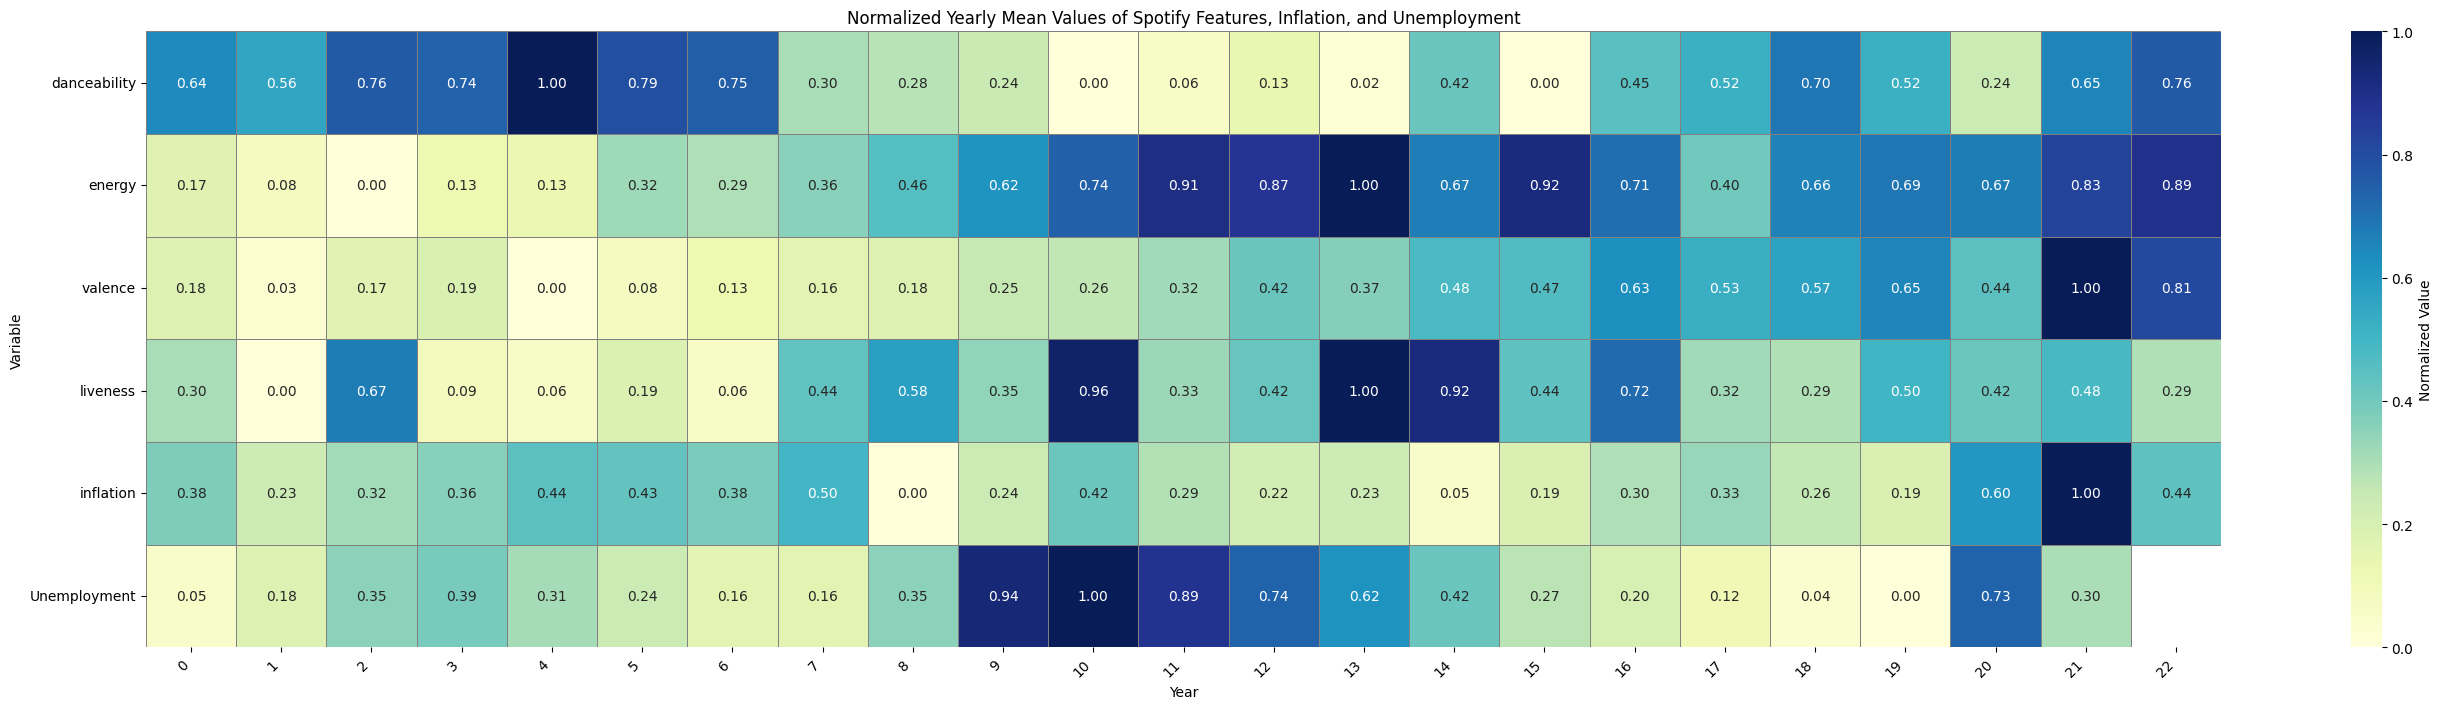

In [ ]:

# Step 1: Combine and normalize data
combined_data = yearly_means[['danceability', 'energy', 'valence', 'liveness', 'inflation']].copy()
combined_data['Unemployment'] = yearly_means2['Unemployment']

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(
    scaler.fit_transform(combined_data),
    index=combined_data.index,
    columns=combined_data.columns
)

# Step 2: Transpose so variables are rows and years are columns
heatmap_data = normalized_data.T  # rows = variables, columns = years

# Step 3: Plot heatmap with larger figure and font for clarity
plt.figure(figsize=(1.2 * len(heatmap_data.columns), 1.2 * len(heatmap_data.index)))  # auto-scale figure size
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Normalized Value'},
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Normalized Yearly Mean Values of Spotify Features, Inflation, and Unemployment')
plt.ylabel('Variable')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()




Now, let us have a look at some other variables. In the next graph we will examine the popularity of genres, and how this changes over the years. The following graph shows the normalized popularity per genre. Because there are so many niche genres, we decided to categorize them into overarching genres, for example, all genres that contain the word "pop", became part of the pop genre.



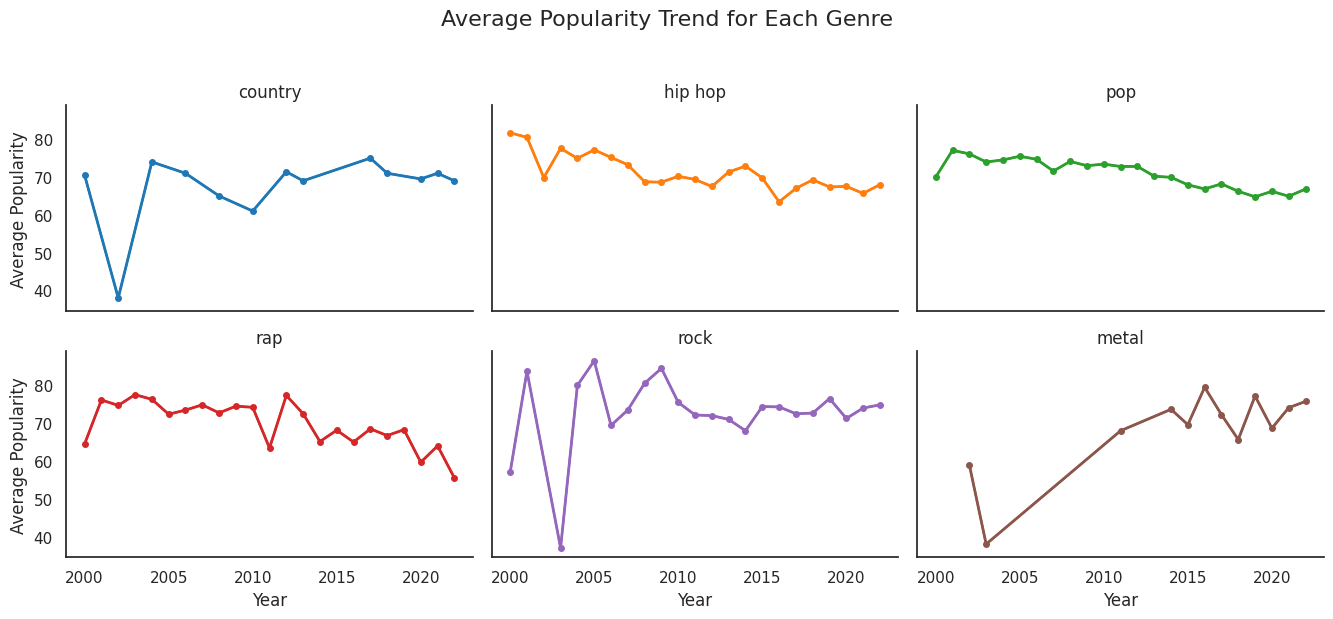

In [ ]:
sns.set_theme(style="white")

# Assuming spotify_data is loaded
# Define main genres keywords (lowercase)
main_genres = ["rap", "pop", "rock", "metal", "hip hop", "country"]

def categorize_genre(genre):
    if pd.isna(genre):
        return None
    genre_lower = genre.lower()
    for g in main_genres:
        if g in genre_lower:
            return g
    return None

# Create a new column with categorized genre
spotify_data['main_genre'] = spotify_data['top genre'].apply(categorize_genre)

# Filter to only rows with main_genre assigned (not None)
filtered_data = spotify_data.dropna(subset=['main_genre'])

# Aggregate: mean popularity and count per year and main_genre
agg_data = (
    filtered_data
    .groupby(['year', 'main_genre'])
    .agg(
        avg_popularity=('popularity', 'mean'),
        song_count=('popularity', 'count')
    )
    .reset_index()
)
# --- End of your data preparation ---


# --- PLOT 2: Faceted Line Chart ---
g = sns.FacetGrid(
    agg_data,
    col="main_genre",
    col_wrap=3,  # Create rows of 4 plots
    hue="main_genre", # Assign color to each genre
    palette='tab10',
    height=3,
    aspect=1.5
)

# Map a line plot to each facet
g.map(sns.lineplot, "year", "avg_popularity", linewidth=2)

# Add a marker for each data point to show the years with data
g.map(plt.plot, "year", "avg_popularity", marker="o", ms=4)

g.fig.suptitle('Average Popularity Trend for Each Genre', fontsize=16, y=1.03)
g.set_axis_labels("Year", "Average Popularity")
g.set_titles("{col_name}") # Use the genre name as the title for each subplot
plt.tight_layout()
plt.show()

In [ ]:
grouped = filtered_data.groupby(['year', 'main_genre']).size().reset_index(name='count')
years = sorted(grouped['year'].unique())
all_genres = sorted(grouped['main_genre'].unique())
palette = px.colors.qualitative.Plotly
color_map = {genre: palette[i % len(palette)] for i, genre in enumerate(all_genres)}
initial_year = years[0]
initial_data = grouped[grouped['year'] == initial_year]
fig = go.Figure(
    data=[go.Pie(
        labels=initial_data['main_genre'],
        values=initial_data['count'],
        marker_colors=[color_map[g] for g in initial_data['main_genre']],
        sort=False
    )],
    layout=go.Layout(
        title_text=f"Proportional Distribution of Overarching Genres",
        height=600,
        updatemenus=[{
            'type': 'buttons',
            'direction': 'left',
            'x': 0.6, 'xanchor': 'left',
            'y': 1.2, 'yanchor': 'top',
            'buttons': [
                {
                    'label': 'Play',
                    'method': 'animate',
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]
                },
                {
                    'label': 'Pause',
                    'method': 'animate',
                    'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate'}]
                }
            ]
        }]
    ),
    frames=[
        go.Frame(
            data=[go.Pie(
                labels=grouped[grouped['year'] == year]['main_genre'],
                values=grouped[grouped['year'] == year]['count'],
                marker_colors=[color_map[g] for g in grouped[grouped['year'] == year]['main_genre']],
                sort=False,
                name=str(year)
            )],
            name=str(year)
        ) for year in years
    ]
)
sliders = [{
    'active': 0,
    'yanchor': 'top', 'xanchor': 'left',
    'currentvalue': {'font': {'size': 16}, 'prefix': 'Year: ', 'visible': True, 'xanchor': 'right'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9, 'x': 0.1, 'y': 0,
    'steps': [
        {
            'label': str(year),
            'method': 'animate',
            'args': [
                [str(year)],
                {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}
            ]
        } for year in years
    ]
}]
fig.update_layout(sliders=sliders)
HTML(fig.to_html(include_plotlyjs='cdn'))


As can be seen intuitively, there is no correlation here. It seems like the popularity of genres has nothing to do with economic indicators, but, perhaps, bpm does. Bpm is the tempo of songs, and often shows how fast-paced a song feels to the listener. If we graph the average BPM per genre we obtain the following graph:

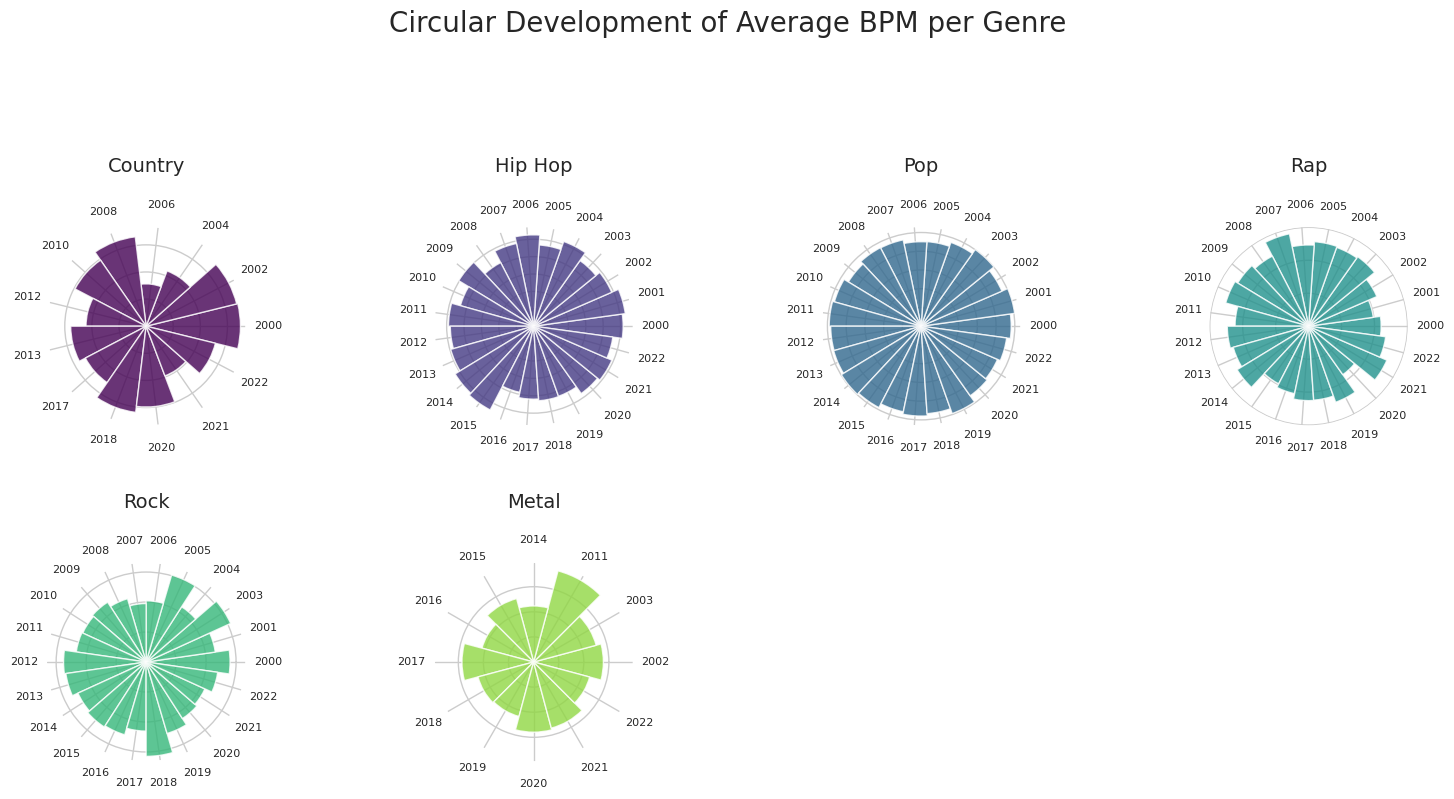

In [ ]:

sns.set_theme(style="whitegrid")

spotify_data['main_genre'] = spotify_data['top genre'].apply(categorize_genre)
filtered_data = spotify_data.dropna(subset=['main_genre'])
bpm_agg_data = (
    filtered_data
    .groupby(['year', 'main_genre'])
    .agg(avg_bpm=('bpm', 'mean'))
    .reset_index()
)

# --- PLOT 1: Faceted Circular Bar Plots ---
genres = bpm_agg_data['main_genre'].unique()
num_genres = len(genres)

ncols = 4
nrows = int(np.ceil(num_genres / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4),
                         subplot_kw={'projection': 'polar'})
axes = axes.flatten()

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = bpm_agg_data[bpm_agg_data['main_genre'] == genre].sort_values('year')

    num_bars = len(genre_data)
    angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False)
    width = (2 * np.pi) / num_bars

    bars = ax.bar(angles, genre_data['avg_bpm'], width=width,
                  color=plt.cm.viridis(i / num_genres), alpha=0.8)

    # --- MODIFIED THIS LINE ---
    # Increased 'pad' from 20 to 40 to lift the title higher.
    ax.set_title(genre.title(), pad=40, fontsize=14)

    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(genre_data['year'], fontsize=8)
    ax.spines['polar'].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Circular Development of Average BPM per Genre', fontsize=20, y=1.03)

fig.tight_layout(pad=3.0)

plt.show()



Once again looking at the circles, the outliers seem fairly random, so let's aggregate the data into a cluster heatmap. to visualise it more intuivitely. This visualization shows a heatmap of the average tempo (BPM) per music genre over the years.
By plotting genres on the y-axis and years on the x-axis, we can observe trends in how the BPM of different genres varied on average across specific years.



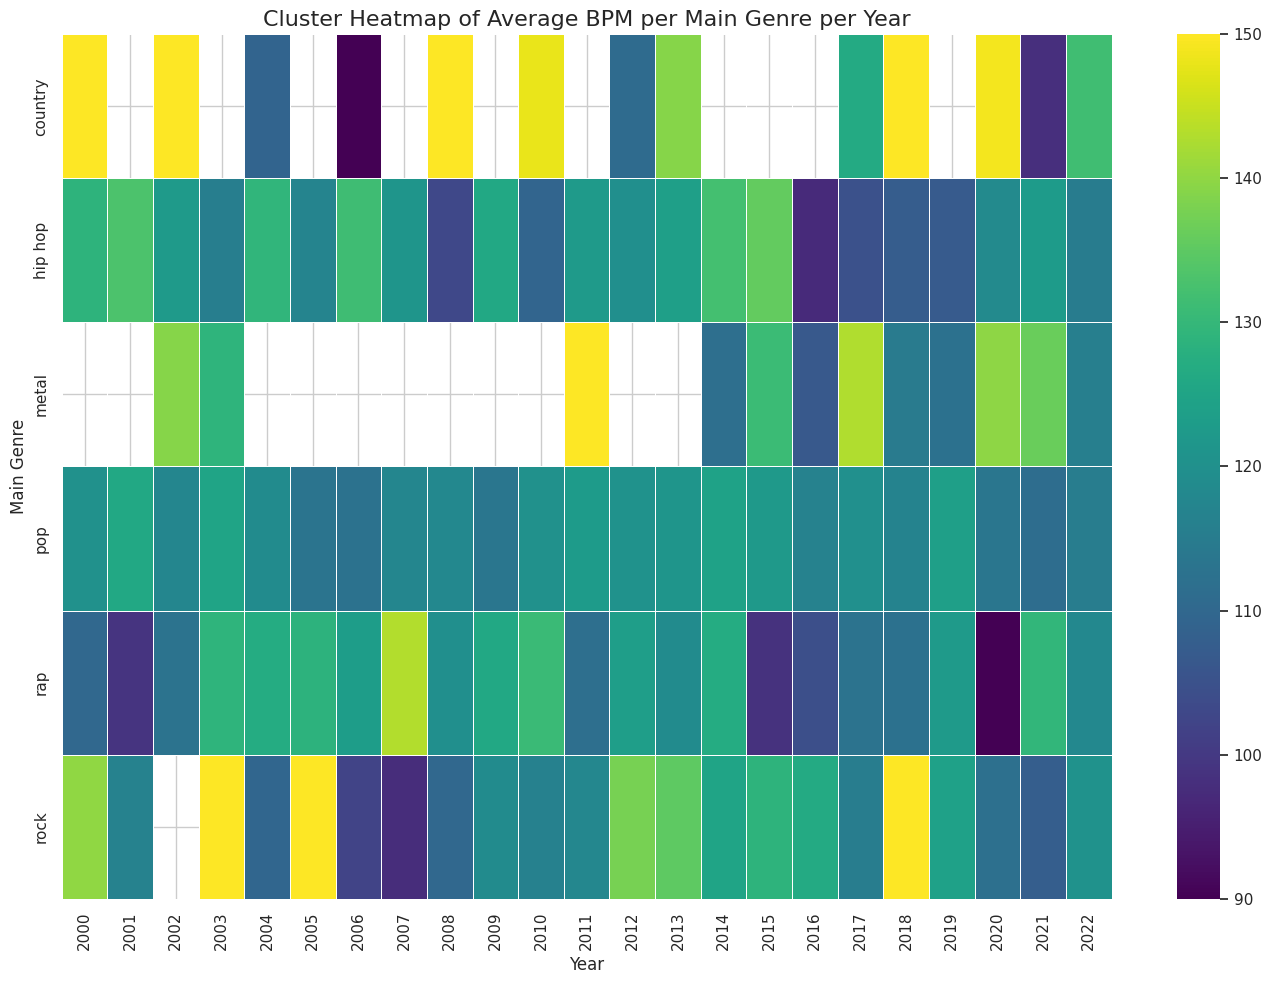

In [ ]:
filtered_data = spotify_data.dropna(subset=['main_genre'])

pivot_df = filtered_data.pivot_table(
    index='main_genre',
    columns='year',
    values='bpm',
    aggfunc='mean'
).fillna(0)

mask = pivot_df == 0

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_df,
    cmap='viridis',      # Colormap for the heatmap
    linewidths=0.5,      # Width of the lines that divide cells
    mask=mask,           # Apply the mask to hide 0 values
    vmin=90,             # Set the minimum value for the colormap
    vmax=150             # Set the maximum value for the colormap
)
plt.title('Cluster Heatmap of Average BPM per Main Genre per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Main Genre', fontsize=12)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('heatmap.png') # Save the heatmap to a file






Generally speaking:
- A **higher BPM** often correlates with energetic, upbeat or optimistic music.
- A **lower BPM** is usually found in calmer, sadder, or more introspective songs.

**Drops in average BPM** may indicate years marked by collective distress or global crises.
  - For example, in **2020**, during the COVID-19 pandemic, many genres show a decline in BPM. This suggests a shift toward more mellow or emotionally reflective music.
  - Similarly, during the **2008 financial crisis**, a lower average BPM in certain genres may reflect a more subdued public mood.

Unfortunately, there seems to be no correlation here either. This could be due to a lack of data points, as some genres appear quite sparingly in comparison to the ever-present "pop" genre. Perhaps if we average the data over all genres there is an interesting pattern.


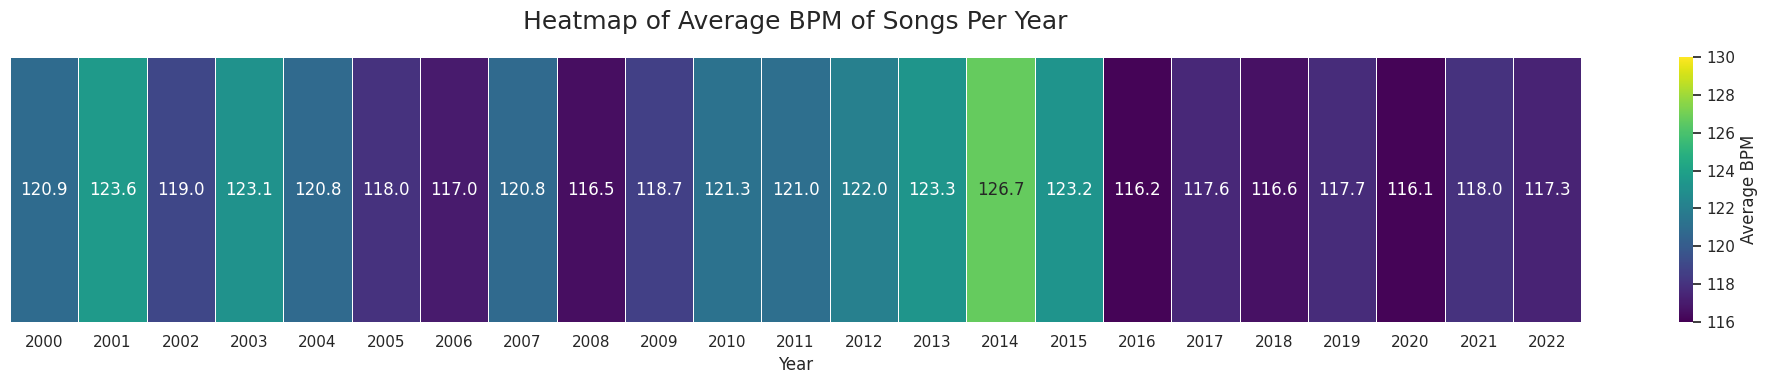

In [ ]:

spotify_df = spotify_data.copy()
spotify_df.columns = spotify_df.columns.str.strip()

mean_bpm_per_year = spotify_df.groupby('year')['bpm'].mean().reset_index()

heatmap_data = mean_bpm_per_year.set_index('year').T

# --- Generate the Heatmap ---
plt.figure(figsize=(20, 4))
sns.heatmap(
    heatmap_data,
    cmap='viridis',
    annot=True,
    fmt=".1f",
    linewidths=.5,
    vmin=116,
    vmax=130,
    cbar_kws={'label': 'Average BPM'}
)

# --- Customize the Plot ---
plt.title('Heatmap of Average BPM of Songs Per Year', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('')
plt.yticks([])
plt.tight_layout()

# Save the plot to a file
plt.savefig('bpm_heatmap_updated_range.png')



While there are interesting occurences of lower BPM around 2007~, this data appears to be far too random.

**Conclusion**

The last part of this notebook really shows the unfortunate truth of it all, there is little of influence of overarching financial patters on spotify listening behaviour. While there are outliers here and there, and even the odd statiscally significant correlation, these can be reasonably argued to be nothing but simple coincidences. What is mainly reinforces, is that while life imitates art and art imitates life, life cannot be distilled into financial statistics. Evaluating the likelihood of our perspectives, we cannoy help but side with perspective 1: there is no correlation between real-world financial data, and spotify listening behaviour.

## Reflection

When we showcased our project to the TA and to a sample group we received a lot of useful feedback. Some of the most important points included:

- Being more detailed in presenting the data, not everyone has an understanding of the spotify data and what it means, especially when it comes to the more emotional/decriptive variables such as "valence"
- Make sure the arguments given are just as intuitive, try to create detailed explanations below every graph, make the interpretation of the data easy for the reader
- Include more variation in the types of data visualisation, and have a more varied spread of data types if possible
- Make a clear distinction between the different perspectives in the final deliverable

We made sure to apply these points of feedback to create a project that is more accessible to readers, without background knowledge of the topic. Additionally, we made an interactive animated pie chart, we included a more detailed analysis of bpm, instead of sticking to the descriptive characteristics.

If we had more time to develop our project, we would start with perfecting the styling of our graphs, making them more interactive and unique. Furthermore, there are other datasets to be used to develop a more nuanced understanding of the subject, that would take a lot of time to mine, or process.
